# Coding tasks for TM HW5
---
#### Anton Buguev B19-RO-01
#### a.buguev@innopolis.university

## Task 1

#### Initialize constants

In [17]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.3 * 10**(-5)
m = 13.6 * 10**(-3)
L = 1500
v0 = 870
g = 9.8

#### Define function to calculate trajectory

In [18]:
def calculate_trajectory(angles, dt):
  result = []
  for i in range(len(angles)):
    # For each of the angles calculate horizontal distance taking into account air resistance
    x = [0]
    y = [0]
    vx = [v0 * np.cos(angles[i])]
    vy = [v0 * np.sin(angles[i])]
    ax = []
    ay = []

    j = 0
    while y[j] >= 0:
      # Calculate until y coordinate will not be 0 again
        vc = np.sqrt(vx[j]**2 + vy[j]**2)
        ax.append(-k / m * vc * vx[j])
        ay.append(-g - k / m * vc * vy[j])

        vx.append(vx[j] + ax[j] * dt)
        vy.append(vy[j] + ay[j] * dt)

        x.append(x[j] + vx[j] * dt + 1 / 2 * ax[j] * dt ** 2)
        y.append(y[j] + vy[j] * dt + 1 / 2 * ay[j] * dt ** 2)
        j += 1
    # Array that contains initial angle and distance of the flight
    result.append([angles[i], x[-1]])
  
  return result

#### Calculate trajectory for angles from 0 to $ \frac{pi}{4} $ because if angle is greater than $ \frac{pi}{4} $ distance of the flight will not increase anymore.

In [19]:
dt = 0.01
angles = np.arange(0, np.pi / 4, 0.01)
initial_result = calculate_trajectory(angles=angles, dt=dt)

#### Function to find angle with nearest length of fly

In [20]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array[:,1] - value)).argmin()
    return idx, array[idx]

#### Find 2 best angles

In [21]:
# Sort values by initial angle
initial_result = sorted(initial_result, key=lambda l:l[0])
best_angles = initial_result.copy()

# Find 2 best results by distance of the flight
index, best_res1 = find_nearest(best_angles, L)
best_angles = np.delete(best_angles, index, axis=0)
index, best_res2 = find_nearest(best_angles, L)
best_angles = np.delete(best_angles, index, axis=0)

#### Calculate trajectory again for angles between to best angles to find the most optimal value for angle $\alpha$.

In [22]:
# In range between 2 best angles find the most suitable angle
small_angles = np.arange(best_res1[0], best_res2[0], 0.0001)
dt = 0.001
final_result = calculate_trajectory(small_angles, dt)

# Find the best angle by nearest value of distance of the flight
idx, best_res = find_nearest(final_result, L)

#### Function to calculate the best trajectory and plot air resistance force.

In [23]:
def calculate_final_trajectory(angle, dt):
  x = [0]
  y = [0]
  vx = [v0 * np.cos(angle)]
  vy = [v0 * np.sin(angle)]
  ax = []
  ay = []

  t = [0]
  F = [k * v0 ** 2]

  j = 0
  while y[j] >= 0:
    vc = np.sqrt(vx[j]**2 + vy[j]**2)
    ax.append(-k / m * vc * vx[j])
    ay.append(-g - k / m * vc * vy[j])
    
    vx.append(vx[j] + ax[j] * dt)
    vy.append(vy[j] + ay[j] * dt)
    
    x.append(x[j] + vx[j] * dt + 1 / 2 * ax[j] * dt ** 2)
    y.append(y[j] + vy[j] * dt + 1 / 2 * ay[j] * dt ** 2)

    t.append(t[j] + dt)
    F.append(k * vc ** 2)
    j += 1
  
  return t, F

#### Find air resistance force

Angle alpha is approximately 1.8621128341751747 degrees.

Distance of the flight is 1500.338305844075.



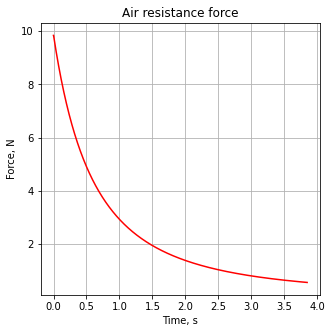

In [30]:
t, F = calculate_final_trajectory(best_res[0], dt)
print(f"Angle alpha is approximately {np.degrees(best_res[0])} degrees.\n")
print(f"Distance of the flight is {best_res[1]}.\n")

# Plot air resistance force
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.set_xlabel("Time, s")
axes.set_ylabel("Force, N")
axes.set_title("Air resistance force")
axes.plot(t, F, color='red')
axes.grid()

## Task 2

0.39999999999999997


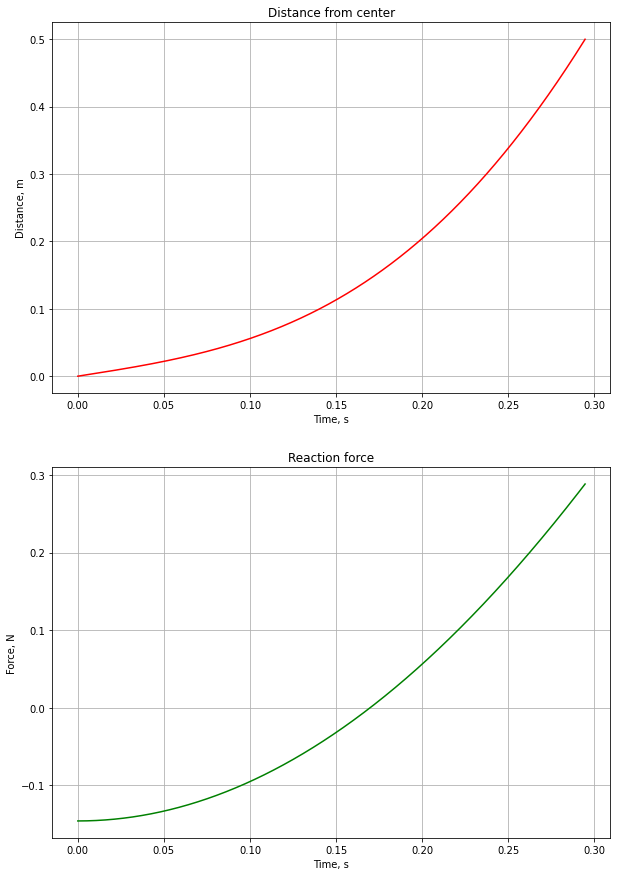

In [15]:
import numpy as np
import matplotlib.pyplot as plt

m = 0.02
w = np.pi
r = 0.5
g = 9.8

t = [0]
dt = 0.00001
x = [0]
N = [2 * m * w * 0.4 - m * g]

i = 0
while x[i] <= r:
  # Using formulas calculate x(t) and N(t)
  C1 = ( - 2 * w + 5 * g * np.sin(w * t[i]) ) / ( 10 * w ** 2)
  C2 = (2 * w + 5 * g * np.sin(w * t[i]) ) / ( 10 * w ** 2)
  x.append(- g * np.sin(w * t[i]) / (w ** 2) + C1 * np.exp(-w * t[i]) + C2 * np.exp(w * t[i]))
  v = - w * (C1 * np.exp(- w * t[i]) - C2 * np.exp(w * t[i]))
  N.append(2 * m * w * v - m * g * np.cos(w * t[i]))
  t.append(t[i] + dt)
  i += 1

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title("Distance from center")
ax1.set_xlabel("Time, s")
ax1.set_ylabel("Distance, m")
ax1.plot(t, x, color='red')

ax2.set_title("Reaction force")
ax2.set_xlabel("Time, s")
ax2.set_ylabel("Force, N")
ax2.plot(t, N, color='green')

ax1.grid()
ax2.grid()